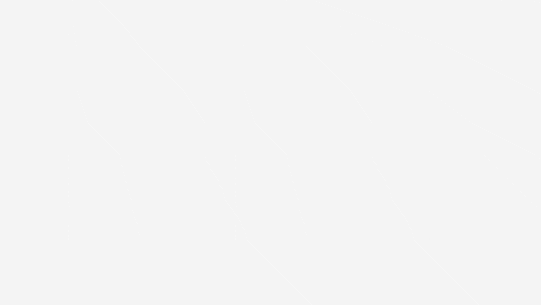

# How to rediscover the Higgs boson yourself - with Machine Learning!
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to apply Machine Learning in search for the Higgs boson!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain for example:
1. live code
2. visualisations
3. narrative text

Notebooks are a perfect platform to develop Machine Learning for your work, since you'll need exactly those 3 things: code, visualisations and narrative text!

We're interested in Machine Learning because we can design an algorithm to figure out for itself how to do various analyses, potentially saving us countless human-hours of design and analysis work.

Machine Learning use within high energy physics includes: 
* particle tracking
* particle identification
* signal/background classification
* and more!

This notebook will focus on signal/background classification.

By the end of this notebook you will be able to:
1. run machine learning models to classify signal and background
2. know some things you can change to improve your machine learning models

This analysis loosely follows the [discovery of the Higgs boson by ATLAS](https://www.sciencedirect.com/science/article/pii/S037026931200857X) (mostly Section 4 and 4.1)

## Running a Jupyter notebook

To run the whole Jupyter notebook, in the top menu click "Run" -> "Run all".

To propagate a change you've made to a piece of code, click "Run" -> "Run after".

You can also run a single code cell, by using the keyboard shortcut Shift+Enter.

## Get started!

We're going to be using a number of tools to help us:
* pandas: lets us store data as dataframes, a format widely used in Machine Learning
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations

In [1]:
import pandas as pd # to store data as dataframe
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting


In [2]:
print(np.__version__)
seed_value = 42 # 42 is the answer to life, the universe and everything
from numpy.random import seed # import the function to set the random seed in NumPy
seed(seed_value) # set the seed value for random numbers in NumPy

1.18.5


In [3]:
# In this notebook we only process the main signal ggH125_ZZ4lep and the main background llll, 
# for illustration purposes.
# You can add other backgrounds after if you wish.
samples = ['llll','ggH125_ZZ4lep','data']

# get data from files

DataFrames = {} # define empty dictionary to hold dataframes
for s in samples: # loop over samples
    DataFrames[s] = pd.read_csv('/kaggle/input/4lepton/'+s+".csv") # read .csv file

DataFrames['ggH125_ZZ4lep'] # print signal data to take a look

,entry,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_eta_0,lep_eta_1,lep_eta_2,lep_eta_3,lep_phi_0,...,lep_ptconerel_3,lep_etconerel_0,lep_etconerel_1,lep_etconerel_2,lep_etconerel_3,min_mll,mZ1,mZ2,mllll,totalWeight
0,0,51.905457,41.248570,16.397670,7.471228,-0.925709,-0.823695,-0.486417,0.266718,-2.774290,...,0.000000,-0.005114,0.034386,0.071266,-0.115843,9.953831,92.628607,23.311568,122.689157,0.000018
1,1,41.430645,40.307168,16.133789,7.481857,-1.233182,-0.396434,-0.541508,-0.302179,0.449031,...,0.151779,-0.030370,0.017931,0.030408,-0.120944,17.821408,86.697751,17.821408,113.659172,0.000034
2,2,33.646711,27.313271,20.035949,16.472641,-0.032324,-0.044153,0.067013,1.859531,-2.077223,...,0.000000,0.016144,-0.012675,0.101923,0.017772,32.122807,62.627431,32.122807,125.399958,0.000040
3,3,77.118562,27.845740,17.726541,14.714521,0.514764,0.845311,2.189158,0.179711,0.115437,...,0.000000,-0.005004,-0.007781,0.000000,0.034991,29.143731,84.535069,29.143731,123.645105,0.000059
4,4,161.909219,53.367754,25.596689,18.864479,-1.037354,-0.821728,-1.261883,0.126195,-0.161717,...,0.000000,0.018625,-0.000264,-0.001246,-0.002172,39.159591,68.958081,48.500839,123.518264,0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164711,164711,32.143482,24.158068,17.203547,14.358152,-1.003832,0.609448,0.876340,1.039745,-0.417631,...,0.000000,-0.020921,0.040304,-0.001333,0.010283,25.926057,62.697352,39.612517,123.352912,0.000019
164712,164712,39.488273,33.694094,32.709998,14.797520,0.184790,0.799441,-0.454989,-1.167309,-0.747386,...,0.000000,0.040552,-0.000592,0.018882,-0.019414,30.654450,56.876117,30.654450,122.652688,0.000054
164713,164713,63.284211,22.707840,15.635994,14.873250,0.935591,0.184483,0.174508,2.128866,-1.503719,...,0.000000,0.010497,-0.015776,-0.022911,-0.003570,30.952590,66.649322,37.686620,124.312299,0.000071
164714,164714,52.538805,40.321457,25.766850,19.381920,0.880250,1.205615,1.701138,0.853039,-2.060255,...,0.000000,0.017046,-0.013661,0.057185,0.000224,19.868087,88.412652,19.868087,124.105421,0.000060


In [4]:
DataFrames["llll"]

,entry,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_eta_0,lep_eta_1,lep_eta_2,lep_eta_3,lep_phi_0,...,lep_ptconerel_3,lep_etconerel_0,lep_etconerel_1,lep_etconerel_2,lep_etconerel_3,min_mll,mZ1,mZ2,mllll,totalWeight
0,0,64.853691,61.677957,48.666441,44.360594,1.511926,0.952760,1.190816,2.102812,1.960999,...,0.029999,-0.005584,-0.002022,-0.007211,0.011298,91.840621,106.980557,91.840621,229.654277,0.000353
1,1,55.921848,41.498750,18.562252,11.200327,-1.558990,-0.719307,-1.822029,-2.090571,1.956400,...,1.407609,-0.006237,0.012523,0.112979,0.031323,4.202465,90.328529,4.202465,132.688869,0.000086
2,2,84.155969,78.250461,56.973090,56.136598,-0.204045,0.391090,0.457037,-0.584274,-0.723562,...,0.000000,-0.008451,0.003575,0.042670,-0.002353,92.441531,116.196530,92.441531,296.506040,0.001950
3,3,100.780219,26.851668,13.466778,11.434911,0.627362,-0.930592,0.041212,-0.072470,1.774672,...,0.000000,0.033255,0.088487,0.102767,0.009228,4.883220,91.068355,4.883220,101.265195,0.001335
4,4,172.537703,98.566398,74.528453,12.576789,0.589324,-1.312705,-1.988918,1.215276,1.250310,...,0.000000,0.004265,0.004279,0.027250,0.002394,82.989624,374.727122,147.308682,623.674832,0.000177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554274,554274,147.117969,36.520570,22.780432,19.437691,-1.918024,-0.404932,-0.854412,0.354967,1.612541,...,0.000000,0.008105,-0.024077,0.035397,0.001210,55.844045,97.231415,44.696088,284.044776,-0.001044
554275,554275,48.948672,48.862410,39.796707,31.510016,0.872254,-0.570310,0.249776,-1.737656,1.063468,...,0.000000,0.027352,0.022976,0.034499,-0.010535,92.093666,92.152809,92.093666,251.805631,0.000262
554276,554276,119.936562,102.871875,54.995215,20.621857,-2.102342,-1.269684,-2.014429,-1.842380,0.820614,...,0.000000,0.004532,-0.004599,0.005827,-0.005713,30.535058,239.135368,30.535058,317.328837,0.002001
554277,554277,32.009953,31.902018,20.184078,14.703700,0.423795,-0.919044,1.639777,0.755105,-1.280522,...,0.000000,0.007789,0.016551,-0.021334,0.101311,15.793846,90.045157,15.793846,148.304865,0.002193


In [5]:
# cut on lepton type
def cut_lep_type(lep_type_0,lep_type_1,lep_type_2,lep_type_3):
# first lepton is [0], 2nd lepton is [1] etc
# for an electron lep_type is 11
# for a muon lep_type is 13
# only want to keep events where one of eeee, mumumumu, eemumu
    sum_lep_type = lep_type_0 + lep_type_1 + lep_type_2 + lep_type_3
    if sum_lep_type==44 or sum_lep_type==48 or sum_lep_type==52: return True
    else: return False

In [6]:
# apply cut on lepton type
for s in samples:
    # cut on lepton type using the function cut_lep_type defined above
    DataFrames[s] = DataFrames[s][ np.vectorize(cut_lep_type)(DataFrames[s].lep_type_0,
                              		                      DataFrames[s].lep_type_1,
                                          	              DataFrames[s].lep_type_2,
                                                  	      DataFrames[s].lep_type_3) ]
DataFrames['ggH125_ZZ4lep'] # print signal data to take a look

,entry,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_eta_0,lep_eta_1,lep_eta_2,lep_eta_3,lep_phi_0,...,lep_ptconerel_3,lep_etconerel_0,lep_etconerel_1,lep_etconerel_2,lep_etconerel_3,min_mll,mZ1,mZ2,mllll,totalWeight
0,0,51.905457,41.248570,16.397670,7.471228,-0.925709,-0.823695,-0.486417,0.266718,-2.774290,...,0.000000,-0.005114,0.034386,0.071266,-0.115843,9.953831,92.628607,23.311568,122.689157,0.000018
1,1,41.430645,40.307168,16.133789,7.481857,-1.233182,-0.396434,-0.541508,-0.302179,0.449031,...,0.151779,-0.030370,0.017931,0.030408,-0.120944,17.821408,86.697751,17.821408,113.659172,0.000034
2,2,33.646711,27.313271,20.035949,16.472641,-0.032324,-0.044153,0.067013,1.859531,-2.077223,...,0.000000,0.016144,-0.012675,0.101923,0.017772,32.122807,62.627431,32.122807,125.399958,0.000040
3,3,77.118562,27.845740,17.726541,14.714521,0.514764,0.845311,2.189158,0.179711,0.115437,...,0.000000,-0.005004,-0.007781,0.000000,0.034991,29.143731,84.535069,29.143731,123.645105,0.000059
4,4,161.909219,53.367754,25.596689,18.864479,-1.037354,-0.821728,-1.261883,0.126195,-0.161717,...,0.000000,0.018625,-0.000264,-0.001246,-0.002172,39.159591,68.958081,48.500839,123.518264,0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164711,164711,32.143482,24.158068,17.203547,14.358152,-1.003832,0.609448,0.876340,1.039745,-0.417631,...,0.000000,-0.020921,0.040304,-0.001333,0.010283,25.926057,62.697352,39.612517,123.352912,0.000019
164712,164712,39.488273,33.694094,32.709998,14.797520,0.184790,0.799441,-0.454989,-1.167309,-0.747386,...,0.000000,0.040552,-0.000592,0.018882,-0.019414,30.654450,56.876117,30.654450,122.652688,0.000054
164713,164713,63.284211,22.707840,15.635994,14.873250,0.935591,0.184483,0.174508,2.128866,-1.503719,...,0.000000,0.010497,-0.015776,-0.022911,-0.003570,30.952590,66.649322,37.686620,124.312299,0.000071
164714,164714,52.538805,40.321457,25.766850,19.381920,0.880250,1.205615,1.701138,0.853039,-2.060255,...,0.000000,0.017046,-0.013661,0.057185,0.000224,19.868087,88.412652,19.868087,124.105421,0.000060


In [7]:
DataFrames['data'] # print signal data to take a look

,entry,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_eta_0,lep_eta_1,lep_eta_2,lep_eta_3,lep_phi_0,...,lep_ptconerel_2,lep_ptconerel_3,lep_etconerel_0,lep_etconerel_1,lep_etconerel_2,lep_etconerel_3,min_mll,mZ1,mZ2,mllll
0,0,49.138344,43.451648,43.018270,27.352213,-1.657377,-1.010990,-0.020451,0.045347,1.051506,...,0.000000,0.000000,0.018594,-0.017460,-0.029428,0.014509,97.148697,97.148697,40.291820,197.126962
1,1,175.558734,138.846672,106.696531,79.776727,2.076854,0.964199,0.453812,2.398578,1.292963,...,0.000000,0.000000,0.011550,-0.002643,-0.003439,0.028125,83.737853,90.310215,83.737853,649.271931
2,2,65.284066,37.290766,12.426926,8.804564,0.103152,0.431310,0.986463,1.115100,2.329535,...,0.000000,0.000000,0.004699,0.090093,0.131140,0.208067,3.159234,68.212259,3.159234,87.907098
3,3,74.583656,15.147436,10.816199,10.170412,-1.559465,-0.810887,0.972368,-0.800678,2.328564,...,0.000000,1.347434,0.032268,0.141144,-0.030602,-0.032545,71.778303,71.778303,21.904997,146.718901
4,4,146.784703,127.539969,33.562180,29.776129,-0.201372,-0.262230,-0.299742,0.477603,0.560588,...,0.000000,0.000000,0.003488,0.007520,-0.014348,-0.009958,78.707308,131.698455,111.885582,344.775936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,395,53.048145,39.838145,23.835697,7.428501,1.666995,1.282050,0.009336,1.517226,1.620790,...,0.000000,0.000000,-0.009758,0.005254,0.200749,0.156462,16.980503,92.854016,34.108056,149.033446
828,396,114.072234,113.360602,64.472602,26.180354,1.667795,1.195672,1.593309,1.285183,0.055146,...,0.000000,0.000000,0.027953,0.019755,-0.003252,-0.000727,62.646574,159.359081,95.889105,318.595413
829,397,58.532070,40.881121,10.991208,8.818951,-0.279526,-1.318613,-1.699615,-0.706924,-0.891494,...,1.030331,0.783455,0.052803,-0.022667,0.286030,-0.071075,87.817369,87.817369,16.199981,125.830277
830,398,88.545625,50.751836,25.529920,22.951449,-0.845567,0.115409,2.211767,-0.205597,-0.930285,...,0.000000,0.000000,0.037516,-0.002596,-0.014315,-0.011675,88.716034,98.239676,88.716034,305.914725


In [8]:
# cut on lepton charge
def cut_lep_charge(lep_charge_0,lep_charge_1,lep_charge_2,lep_charge_3):
# only want to keep events where sum of lepton charges is 0
    sum_lep_charge = lep_charge_0 + lep_charge_1 + lep_charge_2 + lep_charge_3
    if sum_lep_charge==0: return True
    else: return False

# apply cut on lepton charge
for s in samples:
    # cut on lepton charge using the function cut_lep_charge defined above
    DataFrames[s] = DataFrames[s][ np.vectorize(cut_lep_charge)(DataFrames[s].lep_charge_0,
                                                    	    DataFrames[s].lep_charge_1,
                                                    	    DataFrames[s].lep_charge_2,
                                                    	    DataFrames[s].lep_charge_3) ]
DataFrames['data'] # print signal data to take a look

,entry,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_eta_0,lep_eta_1,lep_eta_2,lep_eta_3,lep_phi_0,...,lep_ptconerel_2,lep_ptconerel_3,lep_etconerel_0,lep_etconerel_1,lep_etconerel_2,lep_etconerel_3,min_mll,mZ1,mZ2,mllll
1,1,175.558734,138.846672,106.696531,79.776727,2.076854,0.964199,0.453812,2.398578,1.292963,...,0.000000,0.000000,0.011550,-0.002643,-0.003439,0.028125,83.737853,90.310215,83.737853,649.271931
2,2,65.284066,37.290766,12.426926,8.804564,0.103152,0.431310,0.986463,1.115100,2.329535,...,0.000000,0.000000,0.004699,0.090093,0.131140,0.208067,3.159234,68.212259,3.159234,87.907098
4,4,146.784703,127.539969,33.562180,29.776129,-0.201372,-0.262230,-0.299742,0.477603,0.560588,...,0.000000,0.000000,0.003488,0.007520,-0.014348,-0.009958,78.707308,131.698455,111.885582,344.775936
5,5,135.680688,82.894797,62.508098,42.552906,1.491337,0.738029,1.243667,0.575527,-0.756303,...,0.000000,0.000000,-0.006926,-0.020373,0.013170,-0.004435,77.179070,92.106956,77.179070,326.583790
7,7,67.713180,42.791816,12.742542,10.291093,-1.526418,-0.061508,-0.689663,-0.616366,-1.403781,...,0.802143,1.159122,0.000217,-0.017704,-0.080910,0.596974,1.053510,86.139630,1.053510,107.422585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,389,51.773375,51.708449,51.148297,30.737582,-1.286350,-1.020263,-0.805689,0.303122,1.177211,...,0.000000,0.078988,-0.005710,0.002906,-0.003981,0.028953,88.153243,102.207642,97.168999,209.585334
826,394,61.561816,25.231277,21.982311,14.411031,-0.656188,-0.043175,0.493404,-0.214533,3.033217,...,0.000000,0.000000,-0.002960,-0.016484,-0.006246,-0.041339,24.720145,85.821002,24.720145,121.270402
827,395,53.048145,39.838145,23.835697,7.428501,1.666995,1.282050,0.009336,1.517226,1.620790,...,0.000000,0.000000,-0.009758,0.005254,0.200749,0.156462,16.980503,92.854016,34.108056,149.033446
828,396,114.072234,113.360602,64.472602,26.180354,1.667795,1.195672,1.593309,1.285183,0.055146,...,0.000000,0.000000,0.027953,0.019755,-0.003252,-0.000727,62.646574,159.359081,95.889105,318.595413


In [9]:
DataFrames['llll']

,entry,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_eta_0,lep_eta_1,lep_eta_2,lep_eta_3,lep_phi_0,...,lep_ptconerel_3,lep_etconerel_0,lep_etconerel_1,lep_etconerel_2,lep_etconerel_3,min_mll,mZ1,mZ2,mllll,totalWeight
0,0,64.853691,61.677957,48.666441,44.360594,1.511926,0.952760,1.190816,2.102812,1.960999,...,0.029999,-0.005584,-0.002022,-0.007211,0.011298,91.840621,106.980557,91.840621,229.654277,0.000353
1,1,55.921848,41.498750,18.562252,11.200327,-1.558990,-0.719307,-1.822029,-2.090571,1.956400,...,1.407609,-0.006237,0.012523,0.112979,0.031323,4.202465,90.328529,4.202465,132.688869,0.000086
2,2,84.155969,78.250461,56.973090,56.136598,-0.204045,0.391090,0.457037,-0.584274,-0.723562,...,0.000000,-0.008451,0.003575,0.042670,-0.002353,92.441531,116.196530,92.441531,296.506040,0.001950
3,3,100.780219,26.851668,13.466778,11.434911,0.627362,-0.930592,0.041212,-0.072470,1.774672,...,0.000000,0.033255,0.088487,0.102767,0.009228,4.883220,91.068355,4.883220,101.265195,0.001335
4,4,172.537703,98.566398,74.528453,12.576789,0.589324,-1.312705,-1.988918,1.215276,1.250310,...,0.000000,0.004265,0.004279,0.027250,0.002394,82.989624,374.727122,147.308682,623.674832,0.000177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554273,554273,67.621102,51.921211,50.100371,44.835277,-0.048422,-1.027761,-1.001176,-2.030865,-1.475042,...,0.000000,-0.004052,-0.014765,0.071271,-0.005560,85.864559,89.960361,85.864559,270.743968,0.000332
554275,554275,48.948672,48.862410,39.796707,31.510016,0.872254,-0.570310,0.249776,-1.737656,1.063468,...,0.000000,0.027352,0.022976,0.034499,-0.010535,92.093666,92.152809,92.093666,251.805631,0.000262
554276,554276,119.936562,102.871875,54.995215,20.621857,-2.102342,-1.269684,-2.014429,-1.842380,0.820614,...,0.000000,0.004532,-0.004599,0.005827,-0.005713,30.535058,239.135368,30.535058,317.328837,0.002001
554277,554277,32.009953,31.902018,20.184078,14.703700,0.423795,-0.919044,1.639777,0.755105,-1.280522,...,0.000000,0.007789,0.016551,-0.021334,0.101311,15.793846,90.045157,15.793846,148.304865,0.002193


In [10]:
lep_pt_2 = { # dictionary containing plotting parameters for the lep_pt_2 histogram
    # change plotting parameters
    'bin_width':1, # width of each histogram bin
    'num_bins':13, # number of histogram bins
    'xrange_min':7, # minimum on x-axis
    'xlabel':r'$lep\_pt$[2] [GeV]', # x-axis label
}
lep_pt_1 = { # dictionary containing plotting parameters for the lep_pt_2 histogram
    # change plotting parameters
    'bin_width':1, # width of each histogram bin
    'num_bins':28, # number of histogram bins
    'xrange_min':7, # minimum on x-axis
    'xlabel':r'$lep\_pt$[1] [GeV]', # x-axis label
}


In [11]:
leppt1 = DataFrames["ggH125_ZZ4lep"].lep_pt_1
leppt2 = DataFrames["ggH125_ZZ4lep"].lep_pt_2
leppt3 = DataFrames["ggH125_ZZ4lep"].lep_pt_3
leppt0 = DataFrames["ggH125_ZZ4lep"].lep_pt_0

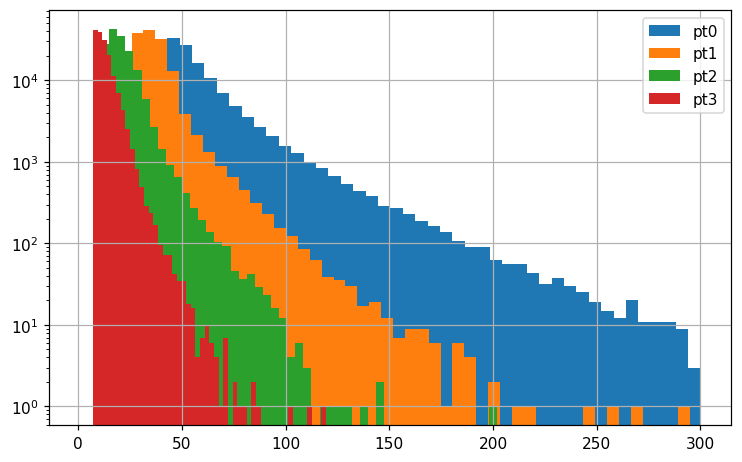

In [12]:
plt.figure(figsize=(8,5),dpi = 110)
leppt0.hist(bins=50,label="pt0",range=(1,300))
leppt1.hist(bins=50,label="pt1")
leppt2.hist(bins=50,label='pt2')
leppt3.hist(bins=50,label='pt3')
plt.yscale('log')
plt.legend()
plt.show()

In [13]:
SoverB_hist_dict = {'lep_pt_2':lep_pt_2,'lep_pt_1':lep_pt_1} # add a histogram here if you want it plotted 


In [14]:
plot_SoverB??

Object `plot_SoverB` not found.


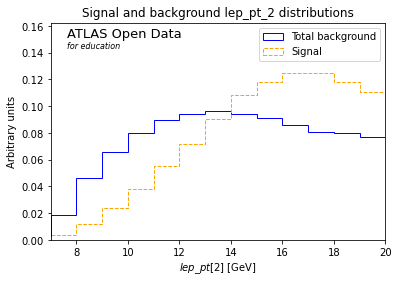

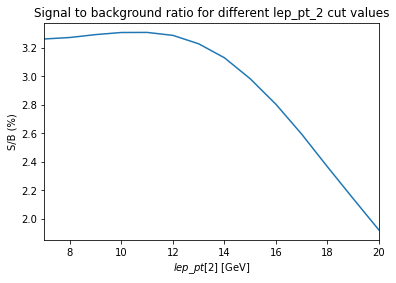

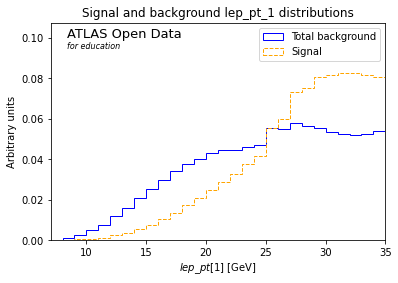

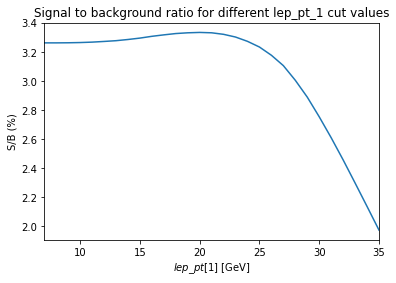

In [15]:
from my_functions import plot_SoverB
plot_SoverB(DataFrames, SoverB_hist_dict)

In [16]:
ML_inputs = ['lep_pt_1','lep_pt_2'] # list of features for ML model

#  Organise data ready for the machine learning model

# for sklearn data are usually organised
# into one 2D array of shape (n_samples x n_features)
# containing all the data and one array of categories 
# of length n_samples

all_MC = [] # define empty list that will contain all features for the MC
for s in samples: # loop over the different samples
    if s!='data': # only MC should pass this
        all_MC.append(DataFrames[s][ML_inputs]) # append the MC dataframe to the list containing all MC features
X = np.concatenate(all_MC) # concatenate the list of MC dataframes into a single 2D array of features, called X

all_y = [] # define empty list that will contain labels whether an event in signal or background
for s in samples: # loop over the different samples
    if s!='data': # only MC should pass this
        if 'H125' in s: # only signal MC should pass this
            all_y.append(np.ones(DataFrames[s].shape[0])) # signal events are labelled with 1
        else: # only background MC should pass this
            all_y.append(np.zeros(DataFrames[s].shape[0])) # background events are labelled 0
y = np.concatenate(all_y) # concatenate the list of lables into a single 1D array of labels, called y

In [17]:
pd.DataFrame({'lep_pt1':X[:,0],
             'lep_pt2': X[:,1],
             'signal_bkg': y})

,lep_pt1,lep_pt2,signal_bkg
0,61.677957,48.666441,0.0
1,41.498750,18.562252,0.0
2,78.250461,56.973090,0.0
3,26.851668,13.466778,0.0
4,98.566398,74.528453,0.0
...,...,...,...
685403,24.158068,17.203547,1.0
685404,33.694094,32.709998,1.0
685405,22.707840,15.635994,1.0
685406,40.321457,25.766850,1.0


In [18]:
# This will split your data into train-test sets: 67%-33%. 
# It will also shuffle entries so you will not get the first 67% of X for training 
# and the last 33% for testing. 
# This is particularly important in cases where you load all signal events first 
# and then the background events.

# Here we split our data into two independent samples. 
# The split is to create a training and testing set. 
# The first will be used for classifier training and the second to evaluate its performance.

from sklearn.model_selection import train_test_split

# make train and test sets
X_train,X_test, y_train,y_test = train_test_split(X, y, 
                                                  test_size=0.33, 
                                                  random_state=seed_value ) # set the random seed for reproducibility

In [19]:
X_train.shape,X.shape
X_test.shape,y_test.shape

((226185, 2), (226185,))

In [20]:
X_train[:5]

array([[31.44883789, 29.92748633],
       [42.49327734, 34.17879688],
       [31.74099414, 17.34528711],
       [33.82497656, 20.1530918 ],
       [52.27634766, 38.68055859]])

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialise StandardScaler

# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train[:5],X_train_scaled[:5]

(array([[31.44883789, 29.92748633],
        [42.49327734, 34.17879688],
        [31.74099414, 17.34528711],
        [33.82497656, 20.1530918 ],
        [52.27634766, 38.68055859]]),
 array([[-0.60938267, -0.11426929],
        [-0.29657126,  0.09600768],
        [-0.60110794, -0.73660604],
        [-0.54208335, -0.59772729],
        [-0.01948558,  0.31867239]]))

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF_clf = RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=30, random_state=seed_value) # initialise your random forest classifier
RF_clf.fit(X_train_scaled, y_train) # fit to the training data
y_pred_RF = RF_clf.predict(X_test_scaled) # make predictions on the test data

# See how well the classifier does
print(accuracy_score(y_test, y_pred_RF))


0.8172381015540376


In [25]:
import torch # import PyTorch
import torch.nn as nn # import PyTorch neural network
import torch.nn.functional as F # import PyTorch neural network functional
from torch.autograd import Variable # create variable from tensor
import torch.utils.data as Data # create data from tensors

In [26]:
# output = [0.01,0.99] prob
# prob.argmax() = > 1 

In [27]:
epochs        = 10                       # number of training epochs
batch_size    = 32                       # number of samples per batch
input_size    = len(ML_inputs)           # The number of features
num_classes   = 2                        # The number of output classes. In this case: [signal, background]
hidden_size   = 5                        # The number of nodes at the hidden layer
learning_rate = 0.01                    # The speed of convergence
verbose       = True                     # flag for printing out stats at each epoch
torch.manual_seed(seed_value)            # set random seed for PyTorch

In [28]:
# Training,
# Used in training


# Testing,
# Used to help measure the performance of our trained model

# Validation
# Used to determine if the model overfitting or not


In [29]:
X_train_tensor = torch.as_tensor(X_train_scaled, dtype=torch.float) # make tensor from X_train_scaled
y_train_tensor = torch.as_tensor(y_train, dtype=torch.long) # make tensor from y_train

X_train_var, y_train_var = Variable(X_train_tensor), Variable(y_train_tensor) # make variables from tensors

X_valid_var, y_valid_var = X_train_var[:100], y_train_var[:100] # get first 100 events for validation
X_train_nn_var, y_train_nn_var = X_train_var[100:], y_train_var[100:] # get remaining events for training

train_data = Data.TensorDataset(X_train_nn_var, y_train_nn_var) # create training dataset
valid_data = Data.TensorDataset(X_valid_var, y_valid_var) # create validation dataset

train_loader = Data.DataLoader(dataset=train_data, # PyTorch Dataset
                               batch_size=batch_size, # how many samples per batch to load
                               shuffle=True) # data reshuffled at every epoch

valid_loader = Data.DataLoader(dataset=valid_data, # PyTorch Dataset
                               batch_size=batch_size, # how many samples per batch to load
                               shuffle=True) # data reshuffled at every epoch

In [30]:
class Classifier_MLP(nn.Module): # define Multi-Layer Perceptron
    def __init__(self, in_dim, hidden_dim, out_dim): # initialise
        super().__init__() # lets you avoid referring to the base class explicitly
        
        self.h1  = nn.Linear(in_dim, hidden_dim) # hidden layer 1
        self.h2  = nn.Linear(in_dim, hidden_dim) # hidden layer 1        
        self.out = nn.Linear(hidden_dim, out_dim) # output layer
        self.out_dim = out_dim # output layer dimension

    def forward(self, x): # order of the layers
        
        x = F.relu(self.h1(x)) # relu activation function for hidden layer
        x = self.out(x) # no activation function for output layer
        
        return x, F.softmax(x, dim=1) # SoftMax function

In [31]:
NN_clf = Classifier_MLP(in_dim=input_size, hidden_dim=hidden_size, out_dim=num_classes) # call Classifier_MLP class
optimizer = torch.optim.SGD(NN_clf.parameters(), lr=learning_rate) # optimize model parameters

In [32]:
_results = [] # define empty list for epoch, train_loss, valid_loss, accuracy
for epoch in range(epochs):  # loop over the dataset multiple times

    # training loop for this epoch
    NN_clf.train() # set the model into training mode
    
    train_loss = 0. # start training loss counter at 0
    for batch, (x_train_batch, y_train_batch) in enumerate(train_loader): # loop over train_loader
        
        NN_clf.zero_grad() # set the gradients to zero before backpropragation because PyTorch accumulates the gradients
        out, prob = NN_clf(x_train_batch) # get output and probability on this training batch
        loss = F.cross_entropy(out, y_train_batch) # calculate loss as cross entropy
        
        loss.backward() # compute dloss/dx
        optimizer.step() # updates the parameters
        
        train_loss += loss.item() * x_train_batch.size(0) # add to counter for training loss
    
    train_loss /= len(train_loader.dataset) # divide train loss by length of train_loader

    if verbose: # if verbose flag set to True
        print('Epoch: {}, Train Loss: {:4f}'.format(epoch, train_loss))

    # validation loop for this epoch:
    NN_clf.eval() # set the model into evaluation mode
    with torch.no_grad():  # turn off the gradient calculations
        
        correct = 0; valid_loss = 0 # start counters for number of correct and validation loss
        for i, (x_valid_batch, y_valid_batch) in enumerate(valid_loader): # loop over validation loader
            
            out, prob = NN_clf(x_valid_batch) # get output and probability on this validation batch
            loss = F.cross_entropy(out, y_valid_batch) # compute loss as cross entropy
            
            valid_loss += loss.item() * x_valid_batch.size(0) # add to counter for validation loss
            
            preds = prob.argmax(dim=1, keepdim=True) # get predictions
            correct += preds.eq(y_valid_batch.view_as(preds)).sum().item() # count number of correct
            
        valid_loss /= len(valid_loader.dataset) # divide validation loss by length of validation dataset
        accuracy = correct / len(valid_loader.dataset) # calculate accuracy as number of correct divided by total

    if verbose: # if verbose flag set to True
        print('Validation Loss: {:4f}, Validation Accuracy: {:4f}'.format(valid_loss, accuracy))

    # create output row:
    _results.append([epoch, train_loss, valid_loss, accuracy])

results = np.array(_results) # make array of results
print('Finished Training')
print("Final validation error: ",100.*(1 - accuracy),"%")

Epoch: 0, Train Loss: 0.410769
Validation Loss: 0.435571, Validation Accuracy: 0.770000
Epoch: 1, Train Loss: 0.397620
Validation Loss: 0.415859, Validation Accuracy: 0.830000
Epoch: 2, Train Loss: 0.387035
Validation Loss: 0.407192, Validation Accuracy: 0.810000
Epoch: 3, Train Loss: 0.379490
Validation Loss: 0.409161, Validation Accuracy: 0.830000
Epoch: 4, Train Loss: 0.374210
Validation Loss: 0.415138, Validation Accuracy: 0.820000
Epoch: 5, Train Loss: 0.373303
Validation Loss: 0.413668, Validation Accuracy: 0.820000
Epoch: 6, Train Loss: 0.373096
Validation Loss: 0.411952, Validation Accuracy: 0.820000
Epoch: 7, Train Loss: 0.372917
Validation Loss: 0.412074, Validation Accuracy: 0.820000
Epoch: 8, Train Loss: 0.372726
Validation Loss: 0.412272, Validation Accuracy: 0.820000
Epoch: 9, Train Loss: 0.372540
Validation Loss: 0.414482, Validation Accuracy: 0.820000
Finished Training
Final validation error:  18.000000000000004 %


In [33]:
X_test_tensor = torch.as_tensor(X_test_scaled, dtype=torch.float) # make tensor from X_test_scaled
y_test_tensor = torch.as_tensor(y_test, dtype=torch.long) # make tensor from y_test

X_test_var, y_test_var = Variable(X_test_tensor), Variable(y_test_tensor) # make variables from tensors

out, prob = NN_clf(X_test_var) # get output and probabilities from X_test
y_pred_NN = prob.cpu().detach().numpy().argmax(axis=1) # get signal/background predictions

In [34]:
y_pred_NN

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
accuracy_score(y_test,y_pred_NN)

0.8152397373831156

In [36]:
epoch,train_loss,val_loss,acc=np.array(results)[:,0],np.array(results)[:,1],np.array(results)[:,2],np.array(results)[:,3]

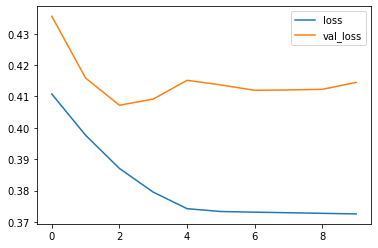

In [37]:
plt.plot(epoch,train_loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.legend()
plt.show()

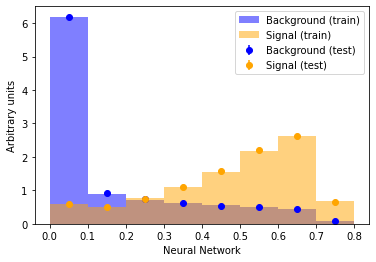

In [38]:
from my_functions import compare_train_test
# compare_train_test(RF_clf, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest output')
compare_train_test(NN_clf,X_train_scaled, y_train, X_test_scaled, y_test,"Neural Network")

In [39]:
from sklearn.metrics import classification_report, roc_auc_score
# Random Forest Report
print (classification_report(y_test, y_pred_RF,
                            target_names=["background", "signal"]))

              precision    recall  f1-score   support

  background       0.87      0.89      0.88    172657
      signal       0.62      0.59      0.60     53528

    accuracy                           0.82    226185
   macro avg       0.75      0.74      0.74    226185
weighted avg       0.81      0.82      0.82    226185



In [40]:
# Neural Network Report
print (classification_report(y_test, y_pred_NN,
                            target_names=["background", "signal"])) 

              precision    recall  f1-score   support

  background       0.87      0.90      0.88    172657
      signal       0.62      0.55      0.58     53528

    accuracy                           0.82    226185
   macro avg       0.75      0.72      0.73    226185
weighted avg       0.81      0.82      0.81    226185



In [41]:
decisions_rf = RF_clf.predict_proba(X_test_scaled)[:,1] # get the decisions of the random forest 
decisions_nn = NN_clf(X_test_var)[1][:,1].cpu().detach().numpy() # get the decisions of the neural network


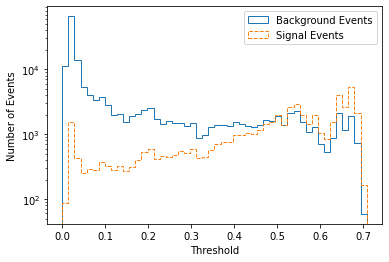

In [42]:
plt.hist(decisions_rf[y_test==0], histtype='step', bins=50, label='Background Events') # plot background
plt.hist(decisions_rf[y_test==1], histtype='step', bins=50, linestyle='dashed', label='Signal Events') # plot signal
plt.xlabel('Threshold') # x-axis label
plt.ylabel('Number of Events') # y-axis label
plt.semilogy() # make the y-axis semi-log
plt.legend() # draw the legend


In [43]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, decisions_rf) # get FPRs, TPRs and thresholds for random forest

In [44]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, decisions_nn) # get FPRs, TPRs and thresholds for neural network


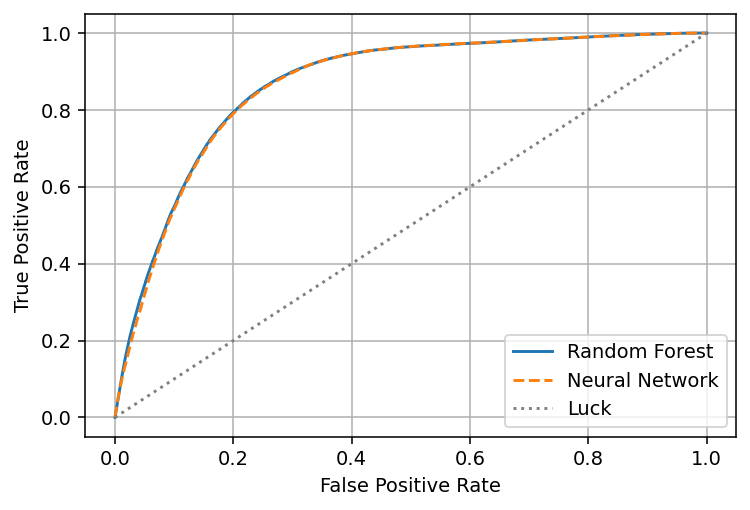

In [45]:
plt.figure(dpi=140)
plt.plot(fpr_rf, tpr_rf, label='Random Forest') # plot random forest ROC
plt.plot(fpr_nn, tpr_nn, linestyle='dashed', label='Neural Network') # plot neural network ROC
plt.plot([0, 1], [0, 1], linestyle='dotted', color='grey', label='Luck') # plot diagonal line to indicate luck
plt.xlabel('False Positive Rate') # x-axis label
plt.ylabel('True Positive Rate') # y-axis label
plt.grid() # add a grid to the plot
plt.legend() # add a legend

In [46]:
def AMS(tpr, fpr, b_reg): # define function to calculate AMS
    return np.sqrt(2*((tpr+fpr+b_reg)*np.log(1+tpr/(fpr+b_reg))-tpr)) # equation for AMS

In [47]:
ams_rf = AMS(fpr_rf, tpr_rf,b_reg = 0)
ams_nn = AMS(fpr_nn, tpr_nn,0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


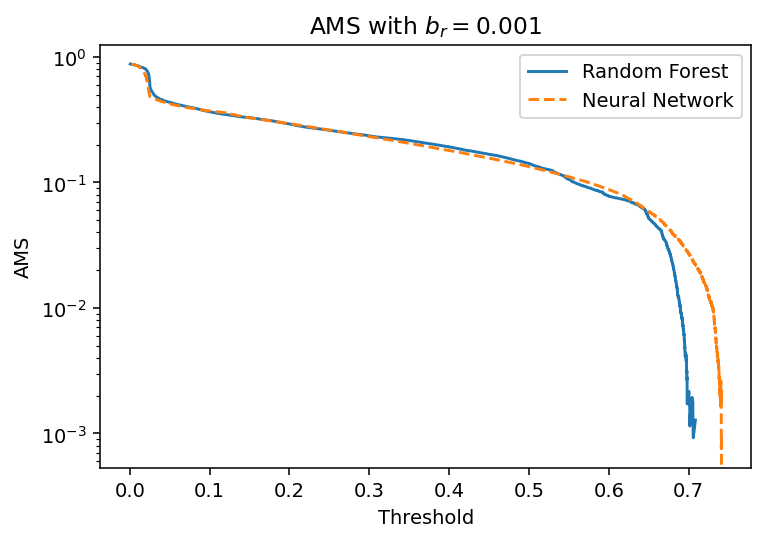

In [48]:
plt.figure(dpi=140)
plt.plot(thresholds_rf, ams_rf, label='Random Forest') # plot random forest AMS
plt.plot(thresholds_nn, ams_nn, linestyle='dashed', label='Neural Network') # plot neural network AMS
plt.xlabel('Threshold') # x-axis label
plt.ylabel('AMS') # y-axis label
plt.title('AMS with $b_r=0.001$') # add plot title
plt.yscale("log")
plt.legend() # add legend

# Working with just data

In [49]:
s = 'data'
DataFrames[s] = pd.read_csv('/kaggle/input/4lepton/data.csv') # read data.csv file


In [50]:
DataFrames[s] = DataFrames[s][ np.vectorize(cut_lep_type)(DataFrames[s].lep_type_0,
                                                    	    DataFrames[s].lep_type_1,
                                                    	    DataFrames[s].lep_type_2,
                                                    	    DataFrames[s].lep_type_3) ]
DataFrames[s] = DataFrames[s][ np.vectorize(cut_lep_charge)(DataFrames[s].lep_charge_0,
                                                    	    DataFrames[s].lep_charge_1,
                                                    	    DataFrames[s].lep_charge_2,
                                                    	    DataFrames[s].lep_charge_3) ]

In [51]:
DataFrames['data'][ML_inputs]
X_data = DataFrames['data'][ML_inputs].values # .values converts straight to NumPy array


In [52]:
X_data

array([[138.84667187, 106.69653125],
       [ 37.29076562,  12.42692578],
       [127.53996875,  33.56217969],
       ...,
       [ 39.83814453,  23.83569727],
       [113.36060156,  64.47260156],
       [ 50.75183594,  25.52991992]])

In [53]:
X_data_scaled = scaler.transform(X_data)

In [54]:
y_data_RF = RF_clf.predict(X_data_scaled) # make predictions on the data

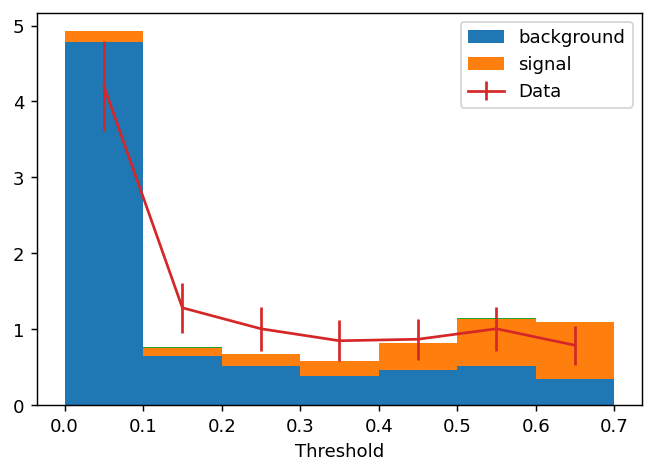

In [55]:
labels = ['background','signal'] # labels for simulated data
thresholds = [] # define list to hold random forest classifier probability predictions for each sample
plt.figure(dpi=130)
for s in samples: # loop over samples
    thresholds.append(RF_clf.predict_proba(scaler.transform(DataFrames[s][ML_inputs]))[:,1]) # predict probabilities for each sample
plt.hist(thresholds, bins=np.arange(0, 0.8, 0.1), density=True, stacked=True, label=labels) # plot simulated data
data_hist = np.histogram(RF_clf.predict_proba(X_data_scaled)[:,1], bins=np.arange(0, 0.8, 0.1), density=True)[0] # histogram the experimental data
scale = sum(RF_clf.predict_proba(X_data_scaled)[:,1]) / sum(data_hist) # get scale imposed by density=True
data_err = np.sqrt(data_hist * scale) / scale # get error on experimental data
plt.errorbar(x=np.arange(0.05, 0.75, 0.1), y=data_hist, yerr=data_err, label='Data') # plot the experimental data errorbars
plt.xlabel('Threshold')
plt.legend() 

In [56]:
print(np.count_nonzero(y_data_RF==1)) # signal

91


In [57]:
print(np.count_nonzero(y_data_RF==0)) # background


416
